In [224]:
import pandas as pd
import numpy as np
import unicodedata
from nltk.tokenize import sent_tokenize #tokenizes sentences
from nltk.tokenize import word_tokenize #tokenizes words
from nltk.corpus import stopwords
import string
from nltk.util import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk import pos_tag #tags the parts of speech.  VB=Verbs
from nltk import RegexpParser
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
punctuation_ = set(string.punctuation)
stopwords_ = set(stopwords.words('english'))

In [225]:
ls archive/

animal_crossing_dataset.csv  doom_crossing_dataset.csv


In [87]:
acnh=pd.read_csv('archive/animal_crossing_dataset.csv')
acnh.columns

Index(['subreddit', 'id', 'title', 'ups', 'downs', 'upvote_ratio',
       'total_awards_received', 'num_comments', 'created_utc', 'url',
       'filename'],
      dtype='object')

In [88]:
doom=pd.read_csv('archive/doom_crossing_dataset.csv')
doom.columns

Index(['subreddit', 'id', 'title', 'ups', 'downs', 'upvote_ratio',
       'total_awards_received', 'num_comments', 'created_utc', 'url',
       'filename'],
      dtype='object')

In [203]:
index_a=pd.Index(acnh['id'])
acnh_sub=pd.DataFrame(acnh['subreddit']).set_index(index_a)
index_d=pd.Index(doom['id'])
doom_sub=pd.DataFrame(doom['subreddit']).set_index(index_d)

In [90]:
Xa=pd.DataFrame(acnh['title']).set_index(index_a)

In [91]:
Xd=pd.DataFrame(doom['title']).set_index(index_d)

In [204]:
X_titles=pd.concat([Xd, Xa])
y=pd.concat([doom_sub ,acnh_sub])

In [205]:
y.shape

(1597, 1)

In [93]:
for title in X_titles.iloc[:,0]:
    title.replace('villagers', 'villager')
    title.replace('oc', "")

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
tfidf = TfidfVectorizer(stop_words='english', smooth_idf=True)  # Checkout out the options!

document_tfidf_matrix = tfidf.fit_transform(X_titles.iloc[:,0])

X_tf_idf = pd.DataFrame(document_tfidf_matrix.todense(), columns = tfidf.vocabulary_)
X_tf_idf.set_index(X_titles.index)

,remember,fun,send,appreciacion,lead,sound,designer,id,chad,mossholder,...,aware,checked,spa,witchy,sleepy,holding,genuinely,38,friendship,screening
id,,,,,,,,,,,,,,,,,,,,,
gtli3b,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fnj4e5,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gemj1h,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fzhpqt,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g4v23f,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g9674v,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fnl57y,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g7mis1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
count_vect = CountVectorizer(lowercase=True, tokenizer=None, stop_words='english',
                             analyzer='word', max_df=1.0, min_df=1,
                             max_features=None)

count_vect.fit(X_titles)
target_names = ['AnimalCrossing', 'Doom']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_tf_idf, y, test_size=0.2)

In [99]:
y_nb_train=pd.get_dummies(y_train).iloc[:,0]
y_nb_test=np.array(y_test).reshape(-1,)

In [100]:
y_nb_train

id
fv33l1    0
fmh5xs    0
f7iy3o    0
gmnmnb    1
gedhtg    1
         ..
fvlwg7    0
b1nre8    0
g56kl8    1
g7nm81    0
fwpzez    0
Name: subreddit_AnimalCrossing, Length: 1277, dtype: uint8

In [101]:
y_nb=pd.get_dummies(y).iloc[:,0]

In [102]:
y_train=y_train.iloc[:,0]

In [103]:
from sklearn.naive_bayes import MultinomialNB

In [104]:
nb_model=MultinomialNB()
nb_model.fit(X_tf_idf, y_nb)

MultinomialNB()

In [105]:
feature_words = tfidf.get_feature_names()
n = 15 #number of top words associated with the category that we wish to see

#for cat in range(len(target_names)):
print(f"\nTarget: {0}, name: {'Doom'}")
log_prob = nb_model.feature_log_prob_[0]
i_topn = np.argsort(log_prob)[::-1][:n]
type(feature_words)
title_words_doom = [feature_words[i] for i in i_topn]
print(f"Top {n} tokens: ", features_topn)


Target: 0, name: Doom
Top 15 tokens:  ['crossing', 'island', 'animal', 'like', 'just', 'day', 'villagers', 'did', 'finally', 'really', 'time', 'blathers', 'oc', 've', 'today']


In [106]:
print(f"\nTarget: {1}, name: {'AnimalCrossing'}")
log_prob = nb_model.feature_log_prob_[1]
i_topn = np.argsort(log_prob)[::-1][:n]
type(feature_words)
title_words_acnh = [feature_words[i] for i in i_topn]
print(f"Top {n} tokens: ", features_topn)


Target: 1, name: AnimalCrossing
Top 15 tokens:  ['crossing', 'island', 'animal', 'like', 'just', 'day', 'villagers', 'did', 'finally', 'really', 'time', 'blathers', 'oc', 've', 'today']


In [40]:
titles_sum=X_tf_idf.sum(axis=0)
titles_sum

remember        0.986554
fun             0.766855
send            3.292632
appreciacion    0.828448
lead            1.688697
                  ...   
holding         1.377251
genuinely       0.474943
38              1.000000
friendship      0.707107
screening       0.707107
Length: 2875, dtype: float64

In [107]:
def get_counts(tokens, series):
    d={}
    for token in tokens:
        d[token]=series[token]
    return pd.DataFrame(d).sum(axis=0)

In [108]:
acnh_titles=get_counts(title_words_acnh, X_tf_idf)

In [167]:
acnh_titles_norm=acnh_titles/np.sum(acnh_titles)
doom_titles_norm=doom_titles/np.sum(doom_titles)

In [59]:
doom_titles=get_counts(title_words_doom, X_tf_idf)

In [ ]:
doom_titles

In [61]:
acnh1=pd.read_csv('NLP/acnh_txt.csv')
doom1=pd.read_csv('NLP/doom_txt.csv')

In [63]:
acnh1 = acnh1[~acnh1['body'].isnull()]
doom1 = doom1[~doom1['body'].isnull()]

In [73]:
import pandas as pd
import numpy as np
import unicodedata
from nltk.tokenize import sent_tokenize #tokenizes sentences
from nltk.tokenize import word_tokenize #tokenizes words
from nltk.corpus import stopwords
import string
from nltk.util import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk import pos_tag #tags the parts of speech.  VB=Verbs
from nltk import RegexpParser
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, KFold
import scipy.stats as scs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
punctuation_ = set(string.punctuation)
stopwords_ = set(stopwords.words('english'))
import matplotlib.pyplot as plt
import re

In [172]:
index_a=pd.Index(acnh1['id'])
acnh_sub=pd.DataFrame(acnh1['subreddit']).set_index(index_a)
index_d=pd.Index(doom1['id'])
doom_sub=pd.DataFrame(doom1['subreddit']).set_index(index_d)

In [173]:
Xa_b=pd.DataFrame(acnh1['body']).set_index(index_a)
Xd_b=pd.DataFrame(doom1['body']).set_index(index_d)
X_body=pd.concat([Xa_b, Xd_b])
X_titles=pd.concat([Xd, Xa])
y=pd.concat([doom_sub ,acnh_sub])

In [174]:
y=pd.get_dummies(y)
y=y.iloc[:,0]

In [175]:
punctuation_.remove('!')
punctuation_.remove('?')

In [176]:
stemmer_porter=PorterStemmer()
stemmer_porter.stem

<bound method PorterStemmer.stem of <PorterStemmer>>

In [177]:
tokens=[]
for i in range(len(X_body)):
    url_rem=re.sub(r'http\S+', '', X_body['body'][i])
    nl_rem=url_rem.replace('\n', '')
    words=word_tokenize(nl_rem)
    lower_words=[w.lower() for w in words]
    filtered_words=[w for w in lower_words if w not in stopwords_ and w not in punctuation_]
    token=[stemmer_porter.stem(words) for words in filtered_words]
    s=' '
    s=s.join(token)
    tokens.append(s)

In [178]:
arr=np.array(tokens)
X=pd.DataFrame(arr, index=X_body.index)
tfidf = TfidfVectorizer(smooth_idf=True)  # Checkout out the options!
document_tfidf_matrix = tfidf.fit_transform(X.iloc[:,0])
X_tf_idf = pd.DataFrame(document_tfidf_matrix.todense(), columns = tfidf.vocabulary_)
X_tf_idf.set_index(X.index)

,want,draw,fanart,view,poll,could,turkey,day,26th,time,...,friendly3,toaster,friendlyi,zandronum,particularli,superman,deadpool,toxin,symbiot,thrash
id,,,,,,,,,,,,,,,,,,,,,
k2xjwx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k2xjwx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k2xja1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k2x9wb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k2x987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jyn1lj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jymyk5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.204218,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jylthc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
y=pd.get_dummies(y)
y_nb=y.iloc[:,0]
nb_model=MultinomialNB()
nb_model.fit(X_tf_idf, y_nb)

MultinomialNB()

In [180]:
feature_words = tfidf.get_feature_names()
n = 15 #number of top words associated with the category that we wish to see

#for cat in range(len(target_names)):
print(f"\nTarget: {0}, name: {'Doom'}")
log_prob = nb_model.feature_log_prob_[0]
i_topn = np.argsort(log_prob)[::-1][:n]
type(feature_words)
body_words_doom = [feature_words[i] for i in i_topn]
print(f"Top {n} tokens: ", title_words_doom)


Target: 0, name: Doom
Top 15 tokens:  ['doom', 'eternal', 'slayer', 'like', 'doomguy', 'rip', 'tear', 'just', 'time', 'marauder', 'oh', 'guy', 'demon', 'game', 'did']


In [181]:
print(f"\nTarget: {1}, name: {'AnimalCrossing'}")
log_prob = nb_model.feature_log_prob_[1]
i_topn = np.argsort(log_prob)[::-1][:n]
type(feature_words)
body_words_acnh = [feature_words[i] for i in i_topn]
print(f"Top {n} tokens: ", title_words_acnh)


Target: 1, name: AnimalCrossing
Top 15 tokens:  ['crossing', 'island', 'animal', 'like', 'just', 'day', 'villagers', 'did', 'finally', 'really', 'time', 'blathers', 'oc', 've', 'today']


In [182]:
acnh_body=get_counts(body_words_acnh, X_tf_idf)

In [183]:
doom_body=get_counts(body_words_doom, X_tf_idf)

In [184]:
acnh_body_norm=acnh_body/np.sum(acnh_body)
doom_body_norm=doom_body/np.sum(doom_body)

In [112]:
acnh_colors=pd.read_csv('acnh_colors.csv')
doom_colors=pd.read_csv('doom_colors.csv')

In [113]:
index_a=pd.Index(acnh['id'])
acnh_sub=pd.DataFrame(acnh['subreddit']).set_index(index_a)
index_d=pd.Index(doom['id'])
doom_sub=pd.DataFrame(doom['subreddit']).set_index(index_d)

In [148]:
X_color=doom_colors.append(acnh_colors).set_index(keys='filename')

In [149]:
X_color

,0b,0count,0g,0r,10b,10count,10g,10r,11b,11count,...,7g,7r,8b,8count,8g,8r,9b,9count,9g,9r
filename,,,,,,,,,,,,,,,,,,,,,
ksn72cinsy151.png,40.0,461.0,45.0,165.0,80.0,2409.0,75.0,80.0,150.0,3143.0,...,70.0,80.0,205.0,1983.0,200.0,210.0,90.0,2091.0,45.0,55.0
ik4d2mpi1fo41.png,60.0,264.0,85.0,30.0,55.0,4404.0,40.0,80.0,80.0,4678.0,...,65.0,110.0,110.0,2963.0,100.0,120.0,95.0,3504.0,85.0,105.0
y5pddy7h16x41.png,80.0,793.0,225.0,225.0,150.0,3905.0,240.0,190.0,145.0,4567.0,...,250.0,155.0,220.0,3253.0,255.0,195.0,170.0,3657.0,245.0,125.0
jrk0eogay8s41.png,70.0,50.0,15.0,250.0,100.0,941.0,100.0,100.0,60.0,1036.0,...,175.0,175.0,200.0,839.0,200.0,200.0,120.0,913.0,125.0,120.0
7c3lyx28tzt41.png,235.0,315.0,45.0,205.0,55.0,2934.0,50.0,65.0,80.0,4306.0,...,100.0,120.0,20.0,1436.0,30.0,185.0,95.0,2929.0,120.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23tuxt9bkev41.png,115.0,1099.0,135.0,90.0,125.0,4320.0,110.0,140.0,40.0,4753.0,...,85.0,120.0,135.0,3736.0,175.0,10.0,80.0,4229.0,70.0,90.0
7o0coqjaqfo41.png,180.0,472.0,75.0,215.0,95.0,2675.0,70.0,205.0,0.0,2991.0,...,215.0,240.0,90.0,2511.0,65.0,100.0,195.0,2519.0,120.0,125.0
w0ddyr9atvu41.png,185.0,2013.0,180.0,190.0,150.0,4349.0,60.0,120.0,125.0,5282.0,...,15.0,45.0,90.0,3823.0,50.0,130.0,175.0,4087.0,95.0,255.0


In [130]:
from sklearn.preprocessing import StandardScaler

In [155]:
y=pd.get_dummies(y)
y_nb=y.iloc[:,0]
standardizer = StandardScaler()
standardizer.fit(X_color)
X_colors=standardizer.transform(X_color)
X_colors=X_colors+10
nb_model=MultinomialNB()
nb_model.fit(X_colors, y_nb)

MultinomialNB()

In [156]:
X_colors

array([[ 8.6522934 ,  9.37631561,  8.86075932, ...,  9.14779021,
         9.09791394,  8.91562108],
       [ 8.93512627,  8.98150224,  9.3654032 , ..., 10.50538247,
         9.62273414,  9.64141871],
       [ 9.21795914, 10.04168638, 11.1316568 , ..., 10.6523829 ,
        11.72201491,  9.93173776],
       ...,
       [10.70283171, 12.48672354, 10.56393243, ..., 11.06552138,
         9.75393919, 11.81881158],
       [ 8.72300162,  9.3542702 ,  8.35611543, ...,  9.18718249,
         9.49152909, 10.36721633],
       [ 8.15733588,  8.77106871,  8.29303495, ...,  7.87474723,
        10.47556695, 10.29463657]])

In [157]:
feature_words = list(X_color.columns)
print(f"\nTarget: {1}, name: {'AnimalCrossing'}")
log_prob = nb_model.feature_log_prob_[1]
i_topn = np.argsort(log_prob)[::-1][:n]
color_factors_acnh = [feature_words[i] for i in i_topn]
print(f"Top {n} tokens: ", color_factors_acnh)


Target: 1, name: AnimalCrossing
Top 15 tokens:  ['18b', '14b', '15b', '17b', '16b', '18r', '13b', '12b', '17r', '15r', '11b', '14r', '10b', '16r', '3count']


In [158]:
#for cat in range(len(target_names)):
print(f"\nTarget: {0}, name: {'Doom'}")
log_prob = nb_model.feature_log_prob_[0]
i_topn = np.argsort(log_prob)[::-1][:n]
type(feature_words)
color_factors_doom = [feature_words[i] for i in i_topn]
print(f"Top {n} tokens: ", color_factors_doom)


Target: 0, name: Doom
Top 15 tokens:  ['0r', '1r', '2r', '19count', '1g', '2g', '4r', '3r', '1b', '0b', '0g', '4g', '6r', '3g', '2b']


In [159]:
acnh_color_counts=get_counts(color_factors_acnh, X_color)
doom_color_counts=get_counts(color_factors_doom, X_color)

In [166]:
acnh_cols=acnh_color_counts/np.sum(acnh_color_counts)
doom_cols=doom_color_counts/np.sum(doom_color_counts)

In [185]:
ls

Color-processing.ipynb  acnh_colors_words.csv   doom_colors_words.csv
Color_ROC_reg.png       acnh_small/             doom_small/
Color_rec_reg.png       acnh_txt.csv            doom_txt.csv
EDA-IM-DF.ipynb         archive/                ex.md
NLP/                    color-logistic.ipynb    naive-bayes.ipynb
README.md               cute/                   webscraping.ipynb
acnh_color/             doom_color/
acnh_colors.csv         doom_colors.csv


In [214]:
doom_colors=pd.read_csv('doom_colors_words.csv')
acnh_colors=pd.read_csv('acnh_colors_words.csv')

In [189]:
acnh_colors

,filename,"100.0, 125.0, 30.0","100.0, 175.0, 105.0","115.0, 145.0, 45.0","125.0, 115.0, 85.0","140.0, 165.0, 75.0","140.0, 215.0, 240.0","15.0, 15.0, 0.0","160.0, 185.0, 90.0","165.0, 170.0, 140.0",...,"180.0, 190.0, 135.0","195.0, 145.0, 90.0","210.0, 225.0, 170.0","220.0, 195.0, 150.0","220.0, 235.0, 185.0","235.0, 245.0, 200.0","245.0, 250.0, 240.0","50.0, 5.0, 0.0","90.0, 40.0, 30.0","35.0, 35.0, 30.0"
0,yjrafuspulu41.png,7526.0,2186.0,9001.0,2743.0,8390.0,2098.0,1055.0,8108.0,1830.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2ehmq0fjpj051.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a2vvzng7g7v41.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,t88z1sn736x41.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,176wf6duetq41.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,23tuxt9bkev41.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
753,7o0coqjaqfo41.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
754,w0ddyr9atvu41.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
755,2v9ke0u7u3251.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2200.0,1951.0,6111.0,5770.0,6091.0,5120.0,6124.0,1327.0,1242.0,0.0


In [215]:
X_color=doom_colors.append(acnh_colors).set_index(keys='filename')

In [191]:
from sklearn.preprocessing import StandardScaler

In [216]:
standardizer=StandardScaler()
standardizer.fit(X_color)
X_colors=standardizer.transform(X_color)

In [206]:
y=pd.get_dummies(y)
y_nb=y.iloc[:,0]

In [207]:
y_nb

id
gtli3b    0
fnj4e5    0
gemj1h    0
fzhpqt    0
g4v23f    0
         ..
g9674v    1
fnl57y    1
g7mis1    1
gtz9fa    1
fmjv7l    1
Name: subreddit_AnimalCrossing, Length: 1597, dtype: uint8

In [208]:
nb_model=MultinomialNB()
nb_model.fit(X_colors, y_nb)

MultinomialNB()

In [217]:
col_names=X_color.columns

In [219]:
feature_words = col_names
print(f"\nTarget: {1}, name: {'AnimalCrossing'}")
log_prob = nb_model.feature_log_prob_[1]
i_topn = np.argsort(log_prob)[::-1][:n]
colors_acnh_words = [feature_words[i] for i in i_topn]
print(f"Top {n} tokens: ", colors_acnh)


Target: 1, name: AnimalCrossing
Top 15 tokens:  ['75.0, 65.0, 60.0', '105.0, 95.0, 85.0', '160.0, 150.0, 135.0', '40.0, 30.0, 25.0', '225.0, 215.0, 210.0', '95.0, 70.0, 50.0', '55.0, 90.0, 45.0', '235.0, 235.0, 235.0', '60.0, 55.0, 45.0', '200.0, 190.0, 185.0', '205.0, 185.0, 65.0', '140.0, 130.0, 115.0', '155.0, 115.0, 70.0', '30.0, 60.0, 85.0', '50.0, 10.0, 220.0']


In [220]:
print(f"\nTarget: {0}, name: {'Doom'}")
log_prob = nb_model.feature_log_prob_[0]
i_topn = np.argsort(log_prob)[::-1][:n]
colors_doom_words = [feature_words[i] for i in i_topn]
print(f"Top {n} tokens: ", colors_doom_words)


Target: 0, name: Doom
Top 15 tokens:  ['15.0, 15.0, 10.0', '190.0, 150.0, 240.0', '40.0, 40.0, 225.0', '120.0, 100.0, 235.0', '170.0, 40.0, 220.0', '25.0, 10.0, 220.0', '95.0, 65.0, 230.0', '65.0, 30.0, 225.0', '150.0, 130.0, 240.0', '0.0, 0.0, 0.0', '115.0, 110.0, 105.0', '85.0, 35.0, 225.0', '175.0, 175.0, 175.0', '60.0, 65.0, 230.0', '195.0, 220.0, 255.0']


In [221]:
acnh_cw_counts=get_counts(colors_acnh_words, X_color)
doom_cw_counts=get_counts(colors_doom_words, X_color)

In [222]:
acnh_col_word=acnh_cw_counts/np.sum(acnh_cw_counts)
doom_col_word=doom_cw_counts/np.sum(doom_cw_counts)

In [223]:
acnh_col_word

75.0, 65.0, 60.0       0.116979
105.0, 95.0, 85.0      0.087942
160.0, 150.0, 135.0    0.018043
40.0, 30.0, 25.0       0.166995
225.0, 215.0, 210.0    0.015993
95.0, 70.0, 50.0       0.030517
55.0, 90.0, 45.0       0.016580
235.0, 235.0, 235.0    0.394549
60.0, 55.0, 45.0       0.061055
200.0, 190.0, 185.0    0.007236
205.0, 185.0, 65.0     0.002381
140.0, 130.0, 115.0    0.033868
155.0, 115.0, 70.0     0.006288
30.0, 60.0, 85.0       0.023834
50.0, 10.0, 220.0      0.017740
dtype: float64

acnh_body_norm
doom_body_norm
acnh_col_word
doom_col_word
acnh_cols
doom_cols
acnh_titles_norm
doom_titles_norm

In [232]:
plot_list=[acnh_body_norm,
doom_body_norm,
acnh_col_word,
doom_col_word,
acnh_cols,
doom_cols,
acnh_titles_norm,
doom_titles_norm]

In [255]:
d_t_n=doom_titles_norm.append(d)
a_b_n=acnh_body_norm.append(d)
d_b_n=doom_body_norm.append(d)
a_c_w=acnh_col_word.append(d)
d_c_w=doom_col_word.append(d)
a_c=acnh_cols.append(d)
d_c=doom_cols.append(d)
a_t_n=acnh_titles_norm.append(d)
d_t_n=doom_titles_norm.append(d)

In [440]:
doom_cols

0r         0.006519
1r         0.006479
2r         0.006385
19count    0.918266
1g         0.005584
2g         0.005451
4r         0.006174
3r         0.006291
1b         0.005549
0b         0.005666
0g         0.005666
4g         0.005332
6r         0.005801
3g         0.005405
2b         0.005435
dtype: float64

In [248]:
d=pd.Series({' ':1}, index=[' '])
for plot in plot_list:
    plot=plot.append(d)

acnh_body_norm
doom_body_norm
acnh_col_word
doom_col_word
acnh_cols
doom_cols
acnh_titles_norm
doom_titles_norm

In [226]:
import matplotlib.pyplot as plt

In [320]:
doom_col_word

15.0, 15.0, 10.0       0.034109
190.0, 150.0, 240.0    0.001523
40.0, 40.0, 225.0      0.004873
120.0, 100.0, 235.0    0.001121
170.0, 40.0, 220.0     0.000690
25.0, 10.0, 220.0      0.002560
95.0, 65.0, 230.0      0.002040
65.0, 30.0, 225.0      0.001809
150.0, 130.0, 240.0    0.003637
0.0, 0.0, 0.0          0.924756
115.0, 110.0, 105.0    0.005521
85.0, 35.0, 225.0      0.002646
175.0, 175.0, 175.0    0.011376
60.0, 65.0, 230.0      0.002379
195.0, 220.0, 255.0    0.000962
dtype: float64

In [325]:
dc_=list(doom_col_word.index)

In [357]:
240/255

0.9411764705882353

In [362]:
dc_=['#0F0A0F',
 '#BEF096',
 '#28E128',
 '#78EB64',
 '#AADC28',
 '#190ADC',
 '#5F41E6',
 '#411EE1',
 '#96F082',
 '#000000',
 '#736E69',
 '#5523E1',
 '#AFAFAF',
 '#3C41E6',
 '#C3DCFF']

In [364]:
dcc_=['#C34130',
 '#A14130',
 '#A11D30',
 '#A18530',
 '#D28530',
 '#DF8530',
 '#DF7130',
 '#F06727',
 '#FF9301',
 '#EBAF16',
 '#EB9316',
 '#EB9330',
 '#EB0230',
 '#EB4C36',
 '#FCFFFF']

In [370]:
dcc2_=['#51A1FC',
 '#518CFC',
 '#516EFC',
 '#000000',
 '#3B2BFC',
 '#4E515F',
 '#48635F',
 '#756D5F',
 '#8B898A',
 '#2F3002',
 '#2F413C',
 '#3B4168',
 '#484C68',
 '#2A4F77',
 '#2A2C77']

In [432]:
dcc3_=['#FCFFC0',
 '#FCFF93',
 '#FCFF67',
 '#FCE83E',
 '#FCE816',
 '#FCD016',
 '#FCB916',
 '#FC9516',
 '#FC8116',
 '#CB8116',
 '#BC6E16',
 '#BC8316',
 '#BC9416',
 '#2E3C40',
 '#BEA92D']

In [426]:
doom_labels=list(doom_cols.index)

In [428]:
doom_labels= ['20th red',
 '19th red',
 '18th red',
 'most common color',
 '20th green',
 '18th green',
 '16th red',
 '17th red',
 '19th blue',
 '20th blue',
 '20th green',
 '16th green',
 '14th red',
 '17th green',
 '18th blue']

In [431]:
doom_titles_norm

doom        0.030761
eternal     0.058716
slayer      0.037699
like        0.019544
doomguy     0.038513
rip         0.028418
tear        0.028336
just        0.050907
time        0.090161
marauder    0.047661
oh          0.040248
guy         0.038538
demon       0.058277
game        0.327709
did         0.104510
dtype: float64

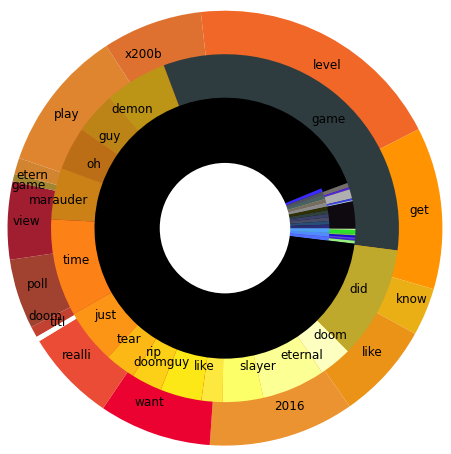

In [435]:
plt.pie(doom_body_norm, colors=dcc_, labels=list(doom_body_norm.index), labeldistance=0.85, radius=2.5, startangle=210, counterclock=False)
plt.pie(doom_titles_norm, colors=dcc3_, labels=list(doom_titles_norm.index), labeldistance=0.80 ,radius=2, startangle=-45, counterclock=False)
plt.pie(doom_col_word, colors=dc_ ,radius=1.5, startangle=12, counterclock=False)
plt.pie(doom_cols, colors= dcc2_, radius=1.2, startangle=0, counterclock=False)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle);

In [417]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']

In [377]:
ac_colors

['75.0, 65.0, 60.0',
 '105.0, 95.0, 85.0',
 '160.0, 150.0, 135.0',
 '40.0, 30.0, 25.0',
 '225.0, 215.0, 210.0',
 '95.0, 70.0, 50.0',
 '55.0, 90.0, 45.0',
 '235.0, 235.0, 235.0',
 '60.0, 55.0, 45.0',
 '200.0, 190.0, 185.0',
 '205.0, 185.0, 65.0',
 '140.0, 130.0, 115.0',
 '155.0, 115.0, 70.0',
 '30.0, 60.0, 85.0',
 '50.0, 10.0, 220.0']

In [378]:
ac_words=['#4B413C',
 '#69555F',
 '#A09687',
 '#281E19',
 '#E1D2D7',
 '#5F324B',
 '#372D5A',
 '#EBEBEB',
 '#3C2D37',
 '#C8BEB9',
 '#CDB941',
 '#8C7382',
 '#FF4673',
 '#1E553C',
 '#32DC0A']

In [438]:
acc = ['#32DC0A',
 '#F5ECED',
 '#F5ECD6',
 '#F5E1C7',
 '#DACFAF',
 '#CDBCAF',
 '#C3ABA8',
 '#B2ABA8',
 '#9C9E9E',
 '#8C847E',
 '#8C8496',
 '#8C84A2',
 '#8C8FA2',
 '#8C9BA2',
 '#F0F3F5']

In [387]:
act = ['#93A5A9',
 '#8ACD92',
 '#9DCD92',
 '#69CD92',
 '#7ACD92',
 '#7BFC47',
 '#98FC47',
 '#C0FC47',
 '#D3FC25',
 '#D3EC51',
 '#3BECA1',
 '#64C870',
 '#64B170',
 '#649270',
 '#647370']

In [400]:
acw = ['#BEFF8C',
 '#DDFF8C',
 '#D08D90',
 '#D0DC90',
 '#D0DCAD',
 '#D0BEAD',
 '#F38FAD',
 '#F3ACC3',
 '#F3EAC3',
 '#C9EAC3',
 '#C0EAA1',
 '#A7FF6A',
 '#F9E0E5',
 '#ECECEB',
 '#6B6E75']

In [402]:
acnh_cols

18b       0.034117
14b       0.033284
15b       0.033244
17b       0.033268
16b       0.033036
18r       0.037113
13b       0.033718
12b       0.034426
17r       0.037036
15r       0.036994
11b       0.034454
14r       0.037689
10b       0.035914
16r       0.036812
3count    0.508895
dtype: float64

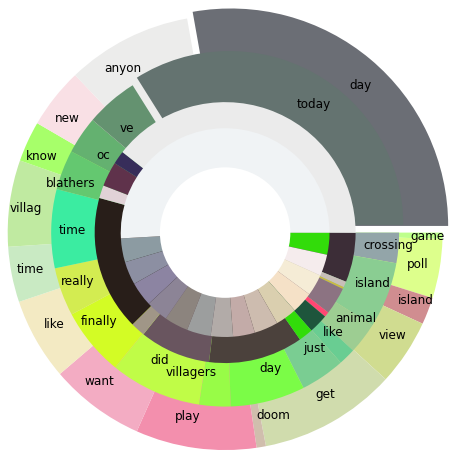

In [439]:
explode=(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1)
plt.pie(acnh_body_norm, explode=explode, colors=acw, labels=list(acnh_body_norm.index), labeldistance=0.85, radius=2.5, startangle=0, counterclock=False)
plt.pie(acnh_titles_norm, explode=explode, colors=act, labels=list(acnh_titles_norm.index), labeldistance=0.80 ,radius=2, startangle=0, counterclock=False)
plt.pie(acnh_col_word, colors=ac_words ,radius=1.5, startangle=-55, counterclock=False)
plt.pie(acnh_cols, colors= acc, radius=1.2, startangle=0, counterclock=False)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle);